# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
# 1. Cookie Problem

# Priors: assume both bowls are equally likely
p_bowl1 = 0.5
p_bowl2 = 0.5

# Likelihoods: probability of vanilla given each bowl
p_vanilla_given_bowl1 = 30 / (30 + 10)  # 30 vanilla, 10 chocolate
p_vanilla_given_bowl2 = 20 / (20 + 20)  # 20 vanilla, 20 chocolate

# Bayes' theorem: P(Bowl1 | Vanilla)
numerator = p_vanilla_given_bowl1 * p_bowl1
denominator = numerator + p_vanilla_given_bowl2 * p_bowl2
p_bowl1_given_vanilla = numerator / denominator

p_bowl1_given_vanilla

0.6

What is the probability that it came from Bowl 2?

In [3]:
# Probability it came from Bowl 2 is simply 1 - P(Bowl 1 | Vanilla)

p_bowl2_given_vanilla = 1 - p_bowl1_given_vanilla
p_bowl2_given_vanilla

0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [4]:
# Likelihoods: probability of chocolate given each bowl
p_choc_given_bowl1 = 10 / (30 + 10)   # Bowl 1: 10 chocolate out of 40
p_choc_given_bowl2 = 20 / (20 + 20)   # Bowl 2: 20 chocolate out of 40

# Priors remain equal
p_bowl1 = 0.5
p_bowl2 = 0.5

# Bayes theorem for chocolate case
num_choc_bowl1 = p_choc_given_bowl1 * p_bowl1
num_choc_bowl2 = p_choc_given_bowl2 * p_bowl2

p_bowl1_given_choc = num_choc_bowl1 / (num_choc_bowl1 + num_choc_bowl2)
p_bowl2_given_choc = num_choc_bowl2 / (num_choc_bowl1 + num_choc_bowl2)

p_bowl1_given_choc, p_bowl2_given_choc

(0.3333333333333333, 0.6666666666666666)

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [5]:
# 2. Candy Problem

# Priors: each assignment of colors-to-bags is equally likely
p_bag1 = 0.5
p_bag2 = 0.5

# Bag 1 color probabilities
bag1 = {
    "brown": 0.30,
    "yellow": 0.20,
    "red": 0.20,
    "green": 0.10,
    "orange": 0.10,
    "tan": 0.10
}

# Bag 2 color probabilities
bag2 = {
    "blue": 0.24,
    "green": 0.20,
    "orange": 0.16,
    "yellow": 0.14,
    "red": 0.13,
    "brown": 0.13
}

# Likelihoods:
# Case A: Yellow came from Bag 1 AND Green came from Bag 2
like_A = bag1["yellow"] * bag2["green"]

# Case B: Yellow came from Bag 2 AND Green came from Bag 1
like_B = bag2["yellow"] * bag1["green"]

# Bayes: P(Y came from Bag 1 | one yellow, one green)
p_yellow_from_bag1 = like_A / (like_A + like_B)

p_yellow_from_bag1

0.7407407407407408

What is the probability that the yellow candy came from Bag 2?

In [6]:
# Probability yellow came from Bag 2 is the complementary case:
# (Yellow from Bag 2 AND Green from Bag 1)

p_yellow_from_bag2 = like_B / (like_A + like_B)
p_yellow_from_bag2

0.25925925925925924

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [7]:
# Probabilities green came from each bag

# Case A: Green came from Bag 2 (because Yellow came from Bag 1)
p_green_from_bag2 = like_A / (like_A + like_B)

# Case B: Green came from Bag 1 (because Yellow came from Bag 2)
p_green_from_bag1 = like_B / (like_A + like_B)

p_green_from_bag1, p_green_from_bag2

(0.25925925925925924, 0.7407407407407408)

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [8]:
# 3. Monty Hall Problem

# Prior probabilities (car is equally likely behind any door)
p_car_A = 1/3
p_car_B = 1/3
p_car_C = 1/3

# Monty opens Door B and reveals no car.
# Monty never opens the door with the car and never opens the player's chosen door.

# Probability of winning if you STAY with Door A:
# This is simply the probability the car was behind A originally.
p_win_stay = p_car_A

# Probability of winning if you SWITCH to Door C:
# This equals the probability the car was behind C originally.
# After Monty opens B, all the probability that was not on A moves to C.
p_win_switch = p_car_B + p_car_C

p_win_stay, p_win_switch

(0.3333333333333333, 0.6666666666666666)

# Bonus: Advanced Bayesian Challenge

## 1. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

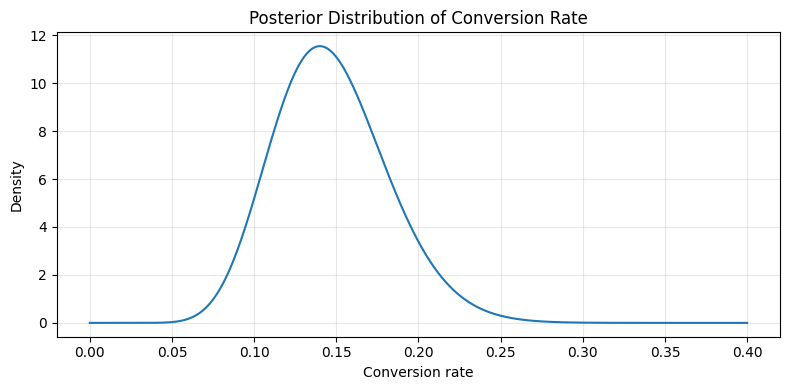

In [9]:
# 1. Bayesian Analysis

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Observed data
n_visitors = 100
n_signups = 14

# Prior: Beta(1, 1) (uniform over [0, 1])
alpha_prior = 1
beta_prior = 1

# Posterior: Beta(alpha_prior + successes, beta_prior + failures)
alpha_post = alpha_prior + n_signups
beta_post = beta_prior + (n_visitors - n_signups)

# Grid of conversion rates
theta = np.linspace(0, 0.4, 500)

# Posterior density
posterior_pdf = beta.pdf(theta, alpha_post, beta_post)

# Plot posterior distribution
plt.figure(figsize=(8, 4))
plt.plot(theta, posterior_pdf)
plt.title("Posterior Distribution of Conversion Rate")
plt.xlabel("Conversion rate")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Produce a set of descriptive statistics for the posterior distribution.

In [10]:
# Descriptive statistics for the posterior Beta distribution

from scipy.stats import beta

# Posterior parameters
a = alpha_post
b = beta_post

# Mean, variance, mode, and a 95% credible interval
post_mean = beta.mean(a, b)
post_var = beta.var(a, b)
post_mode = (a - 1) / (a + b - 2) if a > 1 and b > 1 else np.nan
ci_lower, ci_upper = beta.ppf([0.025, 0.975], a, b)

post_mean, post_var, post_mode, (ci_lower, ci_upper)

(np.float64(0.14705882352941177),
 np.float64(0.0012177915140927874),
 0.14,
 (np.float64(0.0855723288387756), np.float64(0.22162268958860976)))

What is the 90% credible interval range?

In [11]:
# 90% credible interval for the posterior distribution

ci90_lower, ci90_upper = beta.ppf([0.05, 0.95], alpha_post, beta_post)
ci90_lower, ci90_upper

(np.float64(0.09383120735394776), np.float64(0.20817889490003688))

What is the Maximum Likelihood Estimate?

In [12]:
# Maximum Likelihood Estimate (MLE) for the conversion rate
# For a binomial model, MLE = successes / total trials

mle = n_signups / n_visitors
mle

0.14